# **Web Scraping Images from Amazon website**

In [1]:
import requests
from bs4 import BeautifulSoup
import os

In [2]:
def imagedown(url, folder):
    os.mkdir(os.path.join(os.getcwd(), folder))
    os.chdir(os.path.join(os.getcwd(), folder))
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    images = soup.find_all('img')
    for image in images:
        name = image['alt']
        link = image['src']
        with open(name.replace(' ', '-').replace('/', '') + '.jpg', 'wb') as f:
            im = requests.get(link)
            f.write(im.content)
            print('Writing: ', name)

In [3]:
imagedown('https://www.amazon.com.au/s?k=airbuds&crid=1Y7O6SQ3B8OOQ&sprefix=airbu%2Caps%2C339&ref=nb_sb_ss_ts-a-p_1_5', 'amazon_airbuds')

Writing:  
Writing:  Black Friday
Writing:  SoundPEATS Trueair Wireless Earbuds with Charging Case, Bluetooth Headphones Smart Touch Control 30 Hours Playtime, Qualco...
Writing:  SoundPEATS True Wireless Bluetooth Earbuds in-Ear Stereo Bluetooth Headphones Wireless Earphones (Bluetooth 5.0, Built-in ...
Writing:  Wireless Earbuds, TaoTronics Bluetooth Headphones Smart AI Noise Reduction Technology for Clear Calls, Single/Twin Mode, 3...
Writing:  SoundPEATS True Wireless Earbuds, Bluetooh V5.0 Headphones in-Ear TWS Bluetooth Earphones Auto-Pair Wireless Headphones wi...
Writing:  Wireless Earbuds, HaylouGT1 Bluetooth 5.0 Sports HD Stereo Touch Control Earbuds with IPX5 Waterproof/Total 12H Playtime/F...
Writing:  Wireless Earbuds Bluetooh 5.0 Headphones in-Ear TWS Bluetooth Earphones Auto-Pair Noise Reducing Wireless Headphones with ...
Writing:  U-ROK Wireless Earphones Bluetooth 5.0 Earbuds with 3000mAh Charging Case LED Digital Display Touch Control 90H Playtime i...
Writing:  Sams

In [4]:
import os

path = '/content/amazon_airbuds/'

In [5]:
import os
print(os.walk("."))  #Nothing to see here as this is just a generator object

# traverse root directory, and list directories as dirs and files as files
for root, dirs, files in os.walk("."):
    #print(root)  #Prints root directory names
    
    path = root.split(os.sep)  #SPlit at separator (/ or \)
    #print(path)  #Gives names of directories for easy location of files
    #print(files)   #Prints all file names in all directories
    
#Let us now visualize directories and files within them
    print((len(path) - 1) * '---', os.path.basename(root)) #Add --- based on the path
    for file in files:
        print(len(path) * '---', file)

<generator object walk at 0x7f916b9ea620>
 .
--- SoundPEATS-Truengine-SE-Dual-Dynamic-Drivers-Wireless-Earbuds,-Bluetooth-5.0-Headphones-with-Dual-Crossovers,-APTX-Audio-C....jpg
--- Wireless-Earbuds,-TaoTronics-Dual-Mic-Noise-Cancellation-Bluetooth-Headphones-for-Clear-Calls,-SoundLiberty-53-Pro-In-Ear-....jpg
--- Samsung-Galaxy-Buds+,-Black.jpg
--- Samsung-Galaxy-Buds+-Plus,-True-Wireless-Earbuds-(Wireless-Charging-Case-Included),-Red-–-US-Version.jpg
--- Samsung-Galaxy-Buds+-Plus,-True-Wireless-Earbuds-wImproved-Battery-and-Call-Quality-(Wireless-Charging-Case-Included),-Bl....jpg
--- Samsung-Galaxy-Buds-Wireless,-Black.jpg
--- Active-Noise-Cancelling-Headphones,-TaoTronics-Bluetooth-Headphones-[Upgraded-085]-Over-Ear-Wireless-Headphones,-40H-Playt....jpg
--- Xiaomi-2020-Redmi-AirDots-S-TWSEJ05LS-TWS-Bluetooth-5.0-Earphones-True-Wireless-in-Ear-Earbuds-with-Charging-Case-High-Sou....jpg
--- U-ROK-Wireless-Earphones-Bluetooth-5.0-Earbuds-with-3000mAh-Charging-Case-LED-Digital-Display

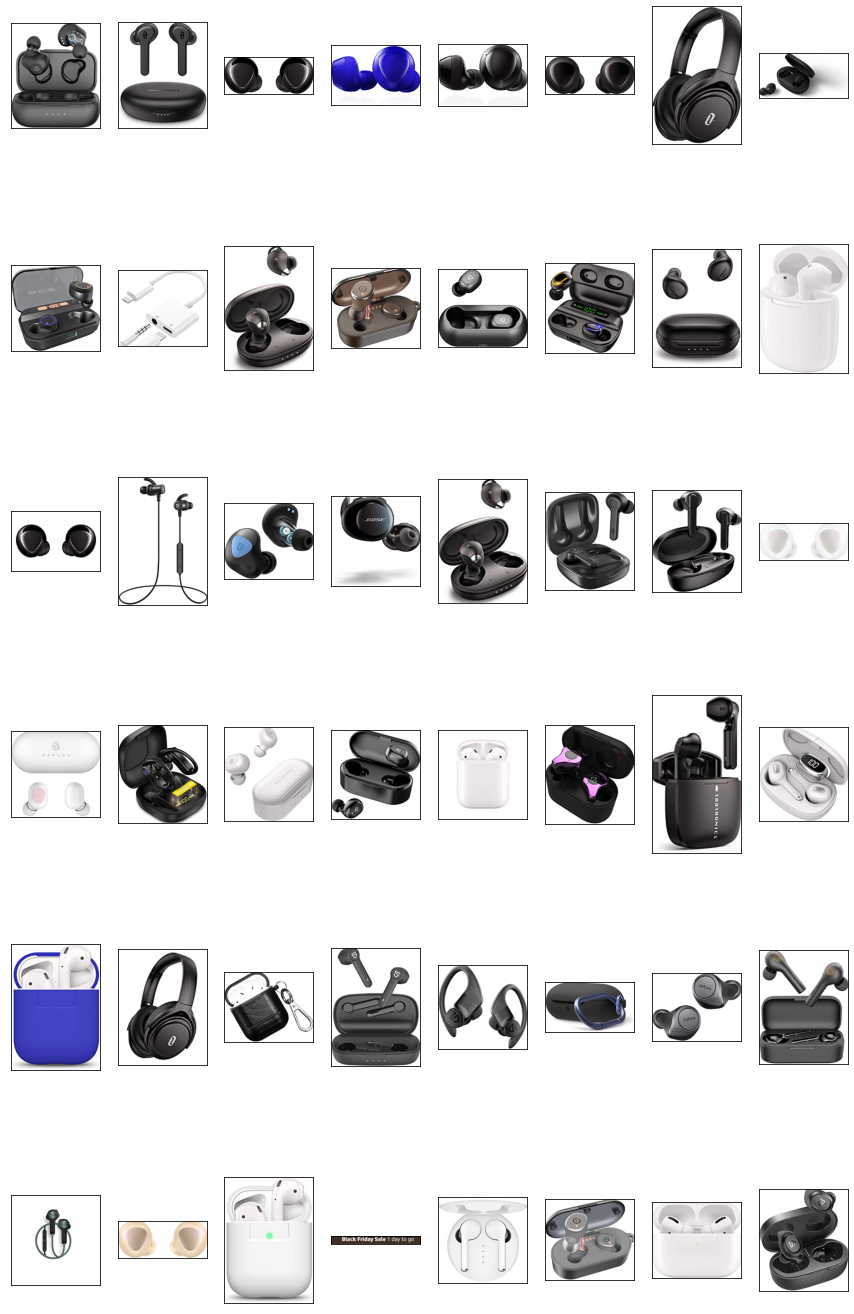

In [8]:
#import the library opencv
import cv2
import glob

file_list = glob.glob('/content/amazon_airbuds/*.*') #Rerurns a list of file names
#print(file_list)  #Prints the list containing file names

#Now let us load each file at a time...
my_list=[]  #Empty list to store images from the folder.
path = '/content/amazon_airbuds/*.*'
for file in glob.glob(path):   #Iterate through each file in the list using for
    #print(file)     #just stop here to see all file names printed
    a= cv2.imread(file)  #now, we can read each file since we have the full path
    my_list.append(a)  #Create a list of images (not just file names but full images)
    
#View images from the stored list
import matplotlib.pyplot as plt

plt.figure(figsize=(15,25))
for i in range(48):
    plt.subplot(6,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(my_list[i], cmap=plt.cm.binary)
plt.show()